# Big-O Notation & Sorting Algorithms

© Explore Data Science Academy

## Learning Objectives
By the end of this train, you should be able to:

* Understand the concepts of big-O Notation,
* Understand the concepts of Sorting Algorithms and their complexity, and
* Write pseudocode for sorting algorithms.

## Outline
In this train we will:

* Explain computational complexity and big-O Notation, and
* Work through several sorting algorithms to characterise their complexity.

## Complexity and Big-O Notation

Big-O notation is a formal mathematical language which helps us define the performance or complexity of a given algorithm. It is defined as the asymptotic upper limit of a function. In plain English, this means it is a notation which helps us know what the maximum space (storage) or time (speed) requirements are when running a piece of code. This notation helps us predict worst-case performance, and allows for various algorithms to be compared. 

When looking at big-O notation, there are two aspects to its syntax.

To help us understand the syntax of big-O notation, let's say that we characterise an algorithm as being $O(x)$ in nature. Here the $O$ refers to the 'order' of the algorithm, and the quantity inside the brackets ($x$ in our case) is this associated growth rate or order. We often express this growth rate in terms of $n$, or the *number of elements* upon which the algorithm needs to act. 

We can use the figure below to help us visually compare the growth rates for some of the complexity categories described by Big O notation. As seen, the order of an algorithm can lead to significantly different complexities being realised with only a small number of input elements.    

![Image](https://raw.githubusercontent.com/Explore-AI/Pictures/master/Big_O_notation.png)

To see the relevance of big-O notation, consider how often there is more than one way to solve a problem. We need to learn how to compare the performance of different algorithms and choose the most efficient way to solve the problem. While analysing an algorithm, we mostly consider time complexity and space complexity. 

* The **Time complexity** of an algorithm represents the amount of time an algorithm takes to complete and is dependent on the size of the input.

* The **Space complexity** of an algorithm represents the amount of space or memory an algorithm requires during operation and is dependent on the size of the input.

To gain an understanding of the basics of big-O notation, let's work through a few examples of the most common growth rates. 

We first import the packages we'll need to compare these methods:

In [1]:
import random
from time import time
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Note: the following implementations were obtained from [A beginner guide of Big O notation.](https://sites.google.com/site/mingchangliu1980/algorithms/a-beginner-guide-of-big-o-notation)

### O(1)

O(1), named Constant Time, represents an algorithm which will always execute in the same time, or space, independant of the size of the input.

In [2]:
def is_first_element_null(elements):
    return elements[0] == None

In this example above, regardless of the number of elements we pass to our function, we will always require a constant number of operations to index and return the element. 

### O(N)

O(N), named Linear Time, represents an algorithm whose performance will grow linearly and in direct proportion to the size of the input. 

The example below also demonstrates how big-O favours the worst-case performance scenario. A matching string could be found during any iteration of the `for loop` and the function would return early, but big-O will always assume the upper limit where the algorithm will perform the maximum number of iterations.

In [3]:
def contains_value(elements, string_value):
    """Run through all elements in the list and compare to string_value."""
    for e in elements:
        if e == string_value:
            return True
    return False

### O(N$^2$)

O(N$^2$), known as Quadratic Time, represents an algorithm whose performance is directly proportional to the square of the size of the input. 

This is common with algorithms that involve nested iterations over the data set. Deeper nested iterations will result in O(N$^3$), O(N$^4$), etc.

In [4]:
def contains_duplicates(elements):
    """Check if any element in a list occurs more than once"""
    for i, e1 in enumerate(elements):
        for j, e2 in enumerate(elements):
            """return a true if the elements indices are different and the elements are the same"""
            if ((i != j) & (e1 == e2)):
                return True
    return False

### O(2$^N$)

O(2$^N$), named Exponential Time, denotes an algorithm whose growth doubles with each addition to the input data set. The growth curve of an O(2$^N$) function is exponential - starting off shallow, then rising meteorically. 

An example of an O(2$^N$) function is the recursive calculation of Fibonacci numbers:

In [5]:
def fibonacci(number):
    """
    The Fibonacci sequence is characterized by the fact that every number 
    after the first two is the sum of the two preceding ones        
    """
    if number <= 1:
        return 1
    return fibonacci(number - 2) + fibonacci(number - 1)

### O(logN)

Logarithms are slightly trickier to explain. O(logN) means that time increases linearly whilst _n_ increases exponentially. This complexity occurs with "divide and conquer" algorithms like binary search as seen in the figure below.

![binary-search.png](https://github.com/Explore-AI/Pictures/blob/master/binary-search.png?raw=true)

The recursion continues until the array examined consists of only one element. Courtesy of Luke Francl.

In [6]:
def binary_search(elements, string_val):

    if len(elements) == 1:
        return 0 if elements[0] == string_val else None
    
    mid = len(elements) // 2
    if string_val == elements[mid]:
        return mid
    
    if string_val < elements[mid]:
        return binary_search(elements[:mid], string_val)
    else:
        return mid + binary_search(elements[mid:], string_val)

In [7]:
binary_search([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 5)

4

## Sorting Algorithms

A sorting algorithm is an algorithm that puts elements of a list in a certain logical order. 

Here let's cover some of the more common sorting algorithms.

### Bubble Sort

Bubble sort is a basic sorting algorithm that is the relatively simple to understand. The basic idea is to 'bubble' up the largest (or smallest) element within a list to its beginning, then the 2nd largest element and the 3rd and so on to the end of the list. Each bubble up takes a full sweep through the list. The following implementation of bubble sort was obtained from [Teach Yourself Python](www.teachyourselfpython.com/)

```python
# Pseudo Code
procedure bubble_sort( input A --> which is a list of sortable items )
    n = length(A)
    repeat 
        swapped = false
        for i = 1 to n-1 inclusive do
            # if this pair is out of order
            if A[i-1] > A[i] then
                # swap them and remember something changed
                swap( A[i-1], A[i] )
                swapped = true
            end if
        end for
    until not swapped
end procedure
```

In [8]:
def bubble_sort(items):
    """ Implementation of bubble sort """
    out = items.copy() # in place protection on items
    for i in range(len(out)):
        for j in range(len(out)-1-i):
            if out[j] > out[j+1]:
                out[j], out[j+1] = out[j+1], out[j]     # Swap!
    
    return out

### Insertion Sort

The Insertion Sort algorithm works by taking elements from an unsorted list and inserting them at the right place in a new sorted list. The sorted list is empty in the beginning. Since the total number of elements in the new and old list stays the same, we can use the same list to represent the sorted and the unsorted sections. 

Implementation for insertion sort can be found at [Geeks for geeks](https://www.geeksforgeeks.org/insertion-sort/)

```python
# Pseudo Code
i = 1
while i < length(A)
    j = i
    while j > 0 and A[j-1] > A[j]
        swap A[j] and A[j-1]
        j = j - 1
    end while
    i = i + 1
end while
```

In [9]:
def insertion_sort(items):
    """ Implementation of insertion sort """
    new_list = [items[0]]    
    for x in items[1:]:
        i = 0
        while (i < len(new_list)) and (x > new_list[i]):
            i += 1
        new_list.insert(i, x)            
    return new_list

### Merge Sort

Merge Sort is a parallelizable algorithm which works by first repeatedly dividing an unsorted list into sub-lists; breaking-down its elements until each is placed within an individual sub-list. A recursive process is then followed to merge neighbouring sublists together in an ordered manner, ultimately yielding a fully sorted list.   

NOTE: Two functions, `merge` and `merge_sort` are often used to implement the merge sort algorithm. 

```python
# Pseudo Code
function merge_sort(list m)
    # Base case. A list of zero or one elements is sorted, by definition.
    if length of m <= 1 then
        return m

    # Recursive case. First, divide the list into equal-sized sublists
    # consisting of the first half and second half of the list.
    # This assumes lists start at index 0.
    left starts as an empty list
    right starts as an  empty list
    for each x with index i in m do
        if i < (length of m)/2 then
            left = left + x
        else
            right = right + x

    # Recursively sort both sublists.
    left = merge_sort(left)
    right = merge_sort(right)

    # Then merge the now-sorted sublists.
    return merge(left, right)
```

``` python
function merge(left, right)
    result starts as an empty list

    while left is not empty and right is not empty do
        if left[0] <= right[0] then
            result = result + left[0] 
            left = left[1:]
        else
            result = result + right[0]
            right = right[1:]

    # Either left or right may have elements left; consume them.
    # (Only one of the following loops will actually be entered.)
    while left is not empty do
        result = result + left[0]
        left = left[1:]
        
    while right is not empty do
        result = result + right[0]
        right = right[1:]
    return result
```

In [10]:
def merge(A, B):  
    """ The merge function used in merge sort """
    new_list = []
    while len(A) > 0 and len(B) > 0:
        if A[0] < B[0]:
            new_list.append(A[0])
            A.pop(0)
        else:
            new_list.append(B[0])
            B.pop(0)
    
    if len(A) == 0:
        new_list = new_list + B    
    if len(B) == 0:
        new_list = new_list + A
        
    return new_list        
            

def merge_sort(items):
    """ Implementation of merge sort """
    len_i = len(items)
    if len_i == 1:
        return items       
        
    mid_point = int(len_i / 2)
    i1 = merge_sort(items[:mid_point])
    i2 = merge_sort(items[mid_point:])       
    
    return merge(i1, i2)

### Quick Sort

The Quick Sort algorithm works by first selecting a pivot element from an unsorted list. It then creates two lists, one containing elements less than the pivot and the other containing elements higher than the pivot. It then sorts the two lists and joins them with the pivot in between. 

Implementation for insertion sort can be found at [Geeks for geeks](https://www.geeksforgeeks.org/quick-sort/)

```Python
# Pseudo Code
function quick_sort(arr, low_index, high_index)

    # The pivot element is always to the right of a joined list
    pivot_element = arr[high_index]
    
    # Index of the smaller element
    i = low_index - 1 
    
    for j = low_index to high_index -1 inclusive do
        # If current element is smaller than the pivot 
        if arr[j] < pivot_element 
            i++ #Increase the index of the smaller element
            swap arr[i] and arr[j]
            
    swap arr[i + 1] and arr[high_index]
    return (i + 1)
```

In [11]:
def quick_sort(items, index=-1):
    """ Implementation of quick sort """
    len_i = len(items)

    if len_i <= 1:
        return items

    pivot = items[index]
    small = []
    large = []
    dup = []
    for i in items:
        if i < pivot:
            small.append(i)
        elif i > pivot:
            large.append(i)
        elif i == pivot:
            dup.append(i)

    small = quick_sort(small)
    large = quick_sort(large)

    return small + dup + large


### Exercise: Heap Sort

This implementation uses the built-in heap data structures in Python. To truly understand Heap sort, one must implement the heap_sort() function themselves.

See if you can code the heapsort algorithm yourself. This is likely to be a challenge.

In [12]:
def heap_sort(items):
    """Your implementation of heap sort"""
    # your code here
def heapify(items, n, i):
    maximum = i
    left = 2*i + 1
    right = 2*i + 2
    if (left < n) and (items[i] < items[left]):
        maximum = left
    if (right < n) and (items[maximum] < items[right]):
        maximum = right
    if maximum != i:
        items[i], items[maximum] = items[maximum], items[i]
        heapify(items, n, maximum)
        
def heap_sort(items):
    n = len(items)
    for i in range(n//2-1, -1, -1):
        heapify(items, n, i)
    for i in range(n-1, 0, -1):
        items[i], items[0] = items[0], items[i]
        heapify(items, i, 0)
    return items

In [13]:
# unit test for your heap_sort function
# this should return True if you're heap_sort was programmed correctly
items = [1, -3, 2, 0, 3, -2, -1]
heap_sort(items) == [-3, -2, -1, 0, 1, 2, 3]

True

### Comparison of sorting algorithms
Let's visualise the run-time results of these sorting algorithms. Before running the following code blocks, spend some time considering which one you think will run the fastest, and why.

We first define some helper functions to help us with our visualisation:

In [14]:
def get_time(fn, num_loops=10):
    """Record the average execution of an input function"""
    output = []
    for n in range(num_loops):
        start = time()
        if type(fn) == str:
            eval(fn)
        else:
            fn
        end = time()
        output.append(end-start)
    output = np.array(output).mean()
    return output

In [15]:
def get_all_times(fn=[], items=[], num_loops=100):
    """Record the individual average execution time for an arrray of input functions"""
    output = np.zeros((len(fn), len(items)))
    for x, f in enumerate(fn):              
        for y, i in enumerate(items):            
            output[x][y] = get_time('{:s}({:s})'.format(f, str(i)), num_loops=num_loops)
    return output

We now define our experimental parameters. We start out by sorting lists containing 1000 random elements: 

In [16]:
num_items = 1000
random_items = [random.randint(-100, 100) for c in range(num_items)]
ordered = sorted(random_items)
reverse_sort = ordered[::-1]

We will compare the following algorithms: 
   * No sort required --> 'sorted'
   * Bubble sort --> 'bubble_sort'
   * Insertion sort --> 'insertion_sort'
   * Merge sort --> 'merge_sort'
   * Quick sort --> 'quick_sort'
   * Heap sort --> 'heap_sort'

In [17]:
fn = ['sorted', 'bubble_sort', 'insertion_sort', 'merge_sort', 'quick_sort', 'heap_sort'] 

In [18]:
items = ['random_items', 'ordered', 'reverse_sort']

With everything set up, let's run our experiment. Note that depending on the specifications of your machine, this may take a while to run.  

In [19]:
compare = get_all_times(fn=fn, items=items)

Let's plot out collected results:

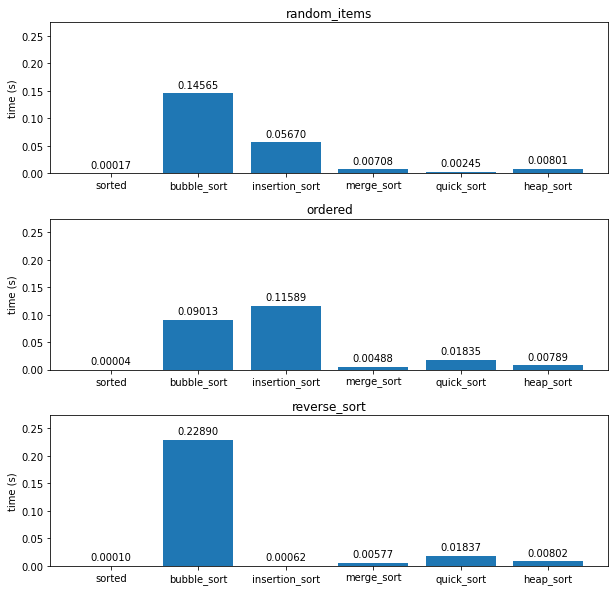

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(10,10), gridspec_kw={'hspace': 0.3})
max_out = compare.max() * 1.2
min_out = 0
for i, a, f in zip(range(len(items)), ax, items):    
    a.bar(x=range(len(fn)), height=compare[:,i])
    a.set_title(f)
    a.set_ylim(bottom=min_out, top=max_out)
    a.set_xticklabels([''] + fn, ha="center")
    a.set_ylabel('time (s)')
    for j, h in zip(range(len(fn)), compare[:, i]):
        a.text(j, h + 0.01, '%.5f' %h, ha='center')
plt.show()

Even though we're speaking about millisecond run-times, we can still see how inefficient the bubble-sort algorithm is compared to its peers, having on average the worst performance. 

What results did you obtain from the heap sort algorithm, and were these in line with your initial intuition?    

### Performance characteristics as input size increases
Let's now see how the performance changes as we vary the number of elements over multiple runs. We perform this for lists in the range of 1 to 5000 elements:

In [21]:
n_runs = [1, 5, 10, 25, 50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000]
n_random = [[random.randint(-100, 100) for c in range(n)] for n in n_runs]

Again, the following code may take some time to run. 

In [22]:
scale = get_all_times(fn=fn, items=n_random, num_loops=1)

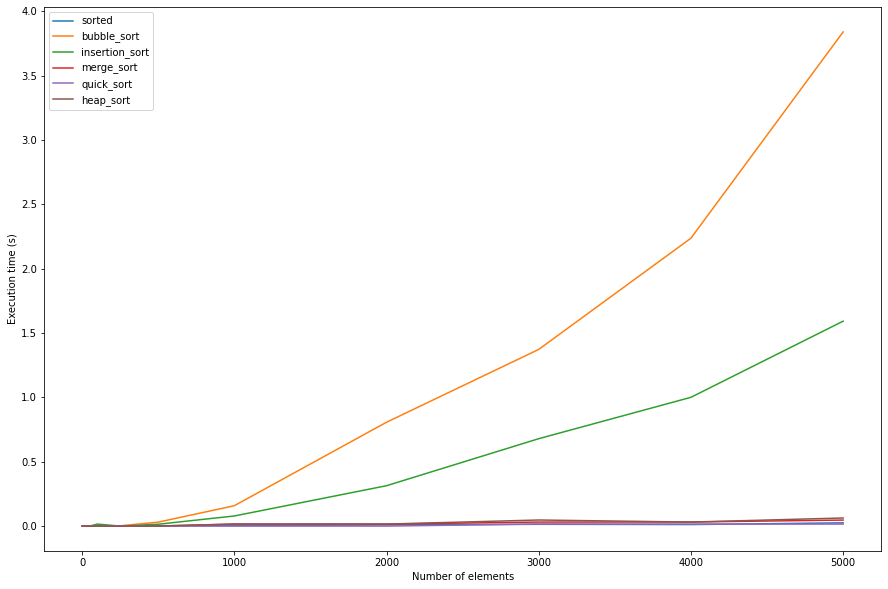

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
max_out = compare.max() * 1.2
min_out = 0
for i, f in enumerate(fn):    
    ax.plot(n_runs, scale[i], label=f)
    ax.legend()
    ax.set_xlabel('Number of elements')
    ax.set_ylabel('Execution time (s)')
fig.show()

We once again get a similar intuition of the complexity of the various sorting algorithms, with bubble sort being significantly more expensive compared to the rest. This result aligns with theory, as the naive versions of the bubble sort algorithm typically have $O(n^2)$ time complexity. 

Alternatively, the quick sort algorithm is seen to have one of the lowest computational costs. Again the theory has our backs here, with the average time complexity of this algorithm being linearithmic with $O(n \log n)$. 

## Conclusion

Understanding the time and space complexity of your algorithm will ensure that you create solutions that are not only accurate but are efficient as well. This train only presents a simple introduction into these concepts and the reader is encouraged to read up further on these concepts.

## Appendix

- [Basic sorting algorithms in python
](http://danishmujeeb.com/blog/2014/01/basic-sorting-algorithms-implemented-in-python/?lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3BCu6nF%2FUCRO2Yz9VwNtpJOg%3D%3D) 